# EDA

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import altair as alt
import matplotlib.pylab as pl

In [2]:
data_dir = '../data/player_data_ready.csv'
out_dir = '../results'

In [3]:
# load data file here
df = pd.read_csv(data_dir)

In [4]:
# make primary key column
df['pk'] = df["playDispNm"] + '_' + df["gmDate"]

#### Remove Unnecessary Columns

In [5]:
info_cols = ['pk', 'playDispNm', 'gmDate', 'teamAbbr']
df = df.drop(columns=info_cols)

#### Train/test split

In [6]:
df_train, df_test = train_test_split(df, test_size=0.2)

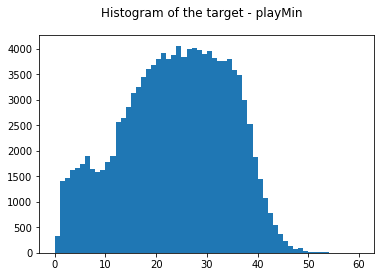

In [7]:
# not using altair because there are too many rows and altair breaks when saving the png file
ax = df_train['playMin'].hist(bins=60, grid=False)
pl.suptitle("Histogram of the target - playMin")
fig = ax.get_figure()
fig.savefig(out_dir+'/EDA-hist_y.png')

In [8]:
correlations = {}
for col in df_train:
    if col == 'playMin':
        continue
    try:
        correlations[col] = round(np.corrcoef(df_train[col], df_train['playMin'])[0][1], 3)
    except:
        continue
        
correl_df = pd.DataFrame.from_dict(correlations, orient='index')
correl_df.columns = ['corr w/ target']
correl_df = correl_df.sort_values('corr w/ target', ascending=False)


In [9]:
correl_df_pos_20 = correl_df.iloc[:20, :].copy()
correl_df_neg_9 = correl_df.iloc[-9:, :].sort_values('corr w/ target').copy()

In [10]:
correl_df_pos_20.to_csv(out_dir+'/EDA-correl_df_pos_20.csv')
correl_df_neg_9.to_csv(out_dir+'/EDA-correl_df_neg_9.csv')

In [11]:
# visualize the correlations
sort = list(correl_df.reset_index()['index'])
corr_line = alt.Chart(correl_df.reset_index()).mark_line().encode(
    x=alt.X('index', sort=sort, 
           axis=alt.Axis(title='Features')),
    y=alt.Y('corr w/ target:Q', 
           axis=alt.Axis(title='Correlation with the target'))
).properties(
    width=600,
    height=200
).configure_axisX(labelAngle = -40).properties(title="Features' correlation with the target")

In [12]:
corr_line.save(out_dir+'/EDA-feat_corr_line.png', scale_factor=2.0)